In [171]:
import pandas as pd
import numpy as np
import seaborn as sns




from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [172]:
df1 = pd.read_csv(r"D:\Singapore resale prioce\resale_price_1990_1999.csv")


In [173]:
df2 = pd.read_csv(r'D:\Singapore resale prioce\resale_price_2000_feb2012.csv')


In [174]:
df3 = pd.read_csv(r'D:\Singapore resale prioce\resale_price_mar2012_dec2014.csv')


In [175]:
df4 = pd.read_csv(r'D:\Singapore resale prioce\resale_price_jan2015_dec2016.csv')


In [176]:
df5 = pd.read_csv(r'D:\Singapore resale prioce\resale_price_jan2017_onwards.csv')

In [177]:
df1.columns #10 cols

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [178]:
df2.columns # 10 cols

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [179]:
df3.columns # 10 cols

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [180]:
df4.columns # 11 cols

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [181]:
df5.columns # 11 cols

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [182]:
# df4 and df5 (2015-2019 and 2017 onwards dataframes) have a extra feature remaining lease, so we will consider the 
# df4 and df5 dataframes 

In [183]:
df6 = pd.concat([df4, df5], axis= 0)
df6.reset_index(drop= True, inplace= True)
df6.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [184]:
df6.shape

(223841, 11)

In [185]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223841 entries, 0 to 223840
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                223841 non-null  object 
 1   town                 223841 non-null  object 
 2   flat_type            223841 non-null  object 
 3   block                223841 non-null  object 
 4   street_name          223841 non-null  object 
 5   storey_range         223841 non-null  object 
 6   floor_area_sqm       223841 non-null  float64
 7   flat_model           223841 non-null  object 
 8   lease_commence_date  223841 non-null  int64  
 9   remaining_lease      223841 non-null  object 
 10  resale_price         223841 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.8+ MB


In [186]:
df6.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [187]:
# There are no null values in the data frame, so no null handling here

## encoding and changing data types

In [188]:
df6.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [189]:
# creating a new column address by using block + strret_name:
df6["address"] = df6["block"] +" "+ df6["street_name"]

In [190]:
# dropping the block and strret name columns:
df6.drop(columns=["block", "street_name"], inplace=True)


In [191]:
df6.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [192]:
# df6 is tranfered to df for easy typing
df = df6.copy()

In [193]:
df.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [194]:
# month

df["month"] = pd.to_datetime(df["month"], format="%Y-%m")

In [195]:
df.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [196]:
# now splitting the month column to day, month & year:
df["year"] = df["month"].dt.year
df["month"] = df["month"].dt.month

In [197]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [198]:
df["town"].nunique()

26

In [199]:
df["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [200]:
df["flat_type"].nunique()

7

In [201]:
df["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [202]:
df["flat_model"].nunique()

21

In [203]:
# choosing labelencoder for town and ordinalencoder for flatmodel and flattype
# because :
# town cannot be ordered in any manner, and flattype and flatmodel can be ordered 

df["town"] = LabelEncoder().fit_transform(df["town"])
df["flat_type"] = OrdinalEncoder().fit_transform(df[["flat_type"]])
df["flat_model"] = OrdinalEncoder().fit_transform(df[["flat_model"]])

In [204]:
df["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [205]:
df["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [206]:
df["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [207]:
df.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,2.0,07 TO 09,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,0,2.0,01 TO 03,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [208]:
# stoery_range has a ranges values, so splitting it into two columns

In [209]:
df[["storey_start", "storey_end"]] = df["storey_range"].str.split(" TO ", expand= True)

In [210]:
df.drop(columns= "storey_range", inplace= True)

In [211]:
df.head(3)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03
2,1,0,2.0,69.0,12.0,1980,64,285000.0,163 ANG MO KIO AVE 4,2015,01,03


In [212]:
# Address have 9559 unique values in the 207823 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df["address"]= LabelEncoder().fit_transform(df["address"])

In [213]:
df.dtypes

month                    int32
town                     int64
flat_type              float64
floor_area_sqm         float64
flat_model             float64
lease_commence_date      int64
remaining_lease         object
resale_price           float64
address                  int64
year                     int32
storey_start            object
storey_end              object
dtype: object

In [214]:
df["storey_end"] = df["storey_end"].astype("int")
df["storey_start"] = df["storey_start"].astype("int")

In [215]:
df["remaining_lease"]

0                         70
1                         65
2                         64
3                         63
4                         64
                 ...        
223836    67 years 07 months
223837    60 years 11 months
223838    59 years 06 months
223839    90 years 08 months
223840              63 years
Name: remaining_lease, Length: 223841, dtype: object

In [216]:
# by seeing the above data we can split it into desired format:
slice_values= []
for i in df["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [217]:
df_data = pd.DataFrame(slice_values, columns=["remaining_lease_year", "remaining_lease_month"])

In [218]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [219]:
#droping the "remaining_lease" column
df.drop(columns=["remaining_lease"],inplace= True)

In [220]:
df7 = pd.concat([df, df_data], axis=1)

In [221]:
df7.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [222]:
# set the columns
df8= df7[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [223]:
df9 =df8.sort_values(by=["year","month"])

In [224]:
df9.to_csv("ResaleFlatPrices.csv", index= False)

<Axes: >

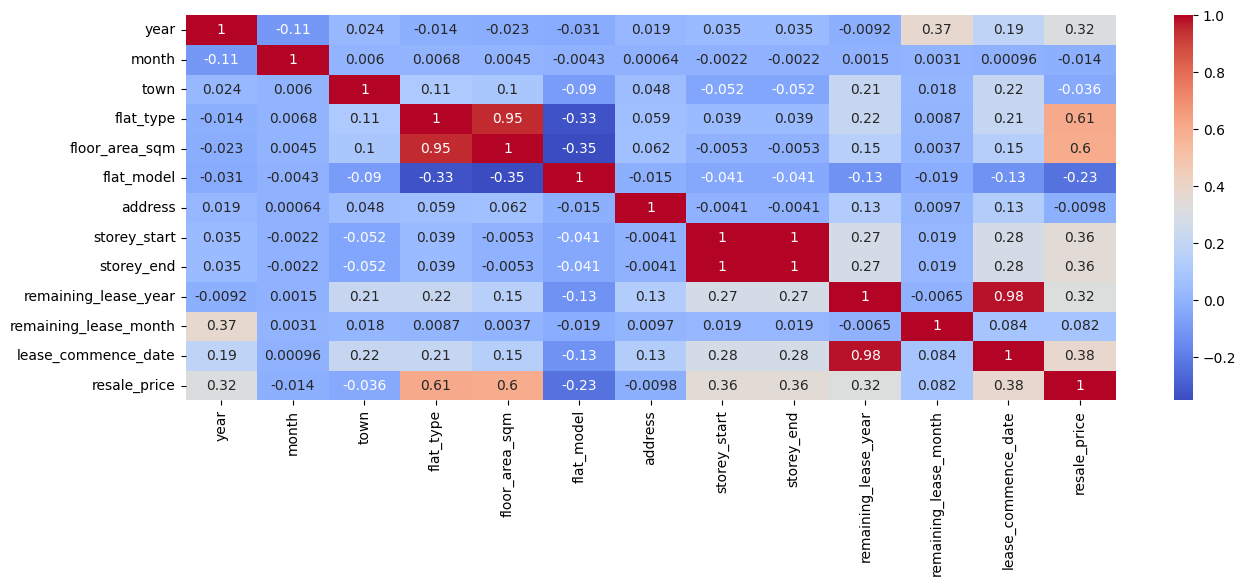

In [225]:
# checking corr():
import matplotlib.pyplot as plt
df9_corr = df9.corr()
df9_corr
plt.figure(figsize=[15, 5])
sns.heatmap(df9_corr, annot= True, cmap="coolwarm", fmt= '.2g')

In [226]:
final_df = pd.read_csv(r"D:\Singapore resale prioce\ResaleFlatPrices.csv")

In [227]:
final_df.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1638,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6600,1,3,65,0,1981,275000.0


In [228]:
# checking the duplicates:

final_df.duplicated().sum()

np.int64(312)

In [229]:
final_df1= final_df.drop_duplicates()
final_df1.reset_index(drop= True, inplace= True)

In [230]:
final_df1.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1638,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6600,1,3,65,0,1981,275000.0


In [231]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns

In [232]:
final_df2 = final_df1.drop(columns=["month","address"])

In [233]:
final_df2.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
223527,2024,25,4.0,112.0,5.0,10,12,90,8,2016,760000.0
223528,2024,25,5.0,153.0,7.0,10,12,63,0,1988,950000.0


In [265]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

C:\Users\sagar\AppData\Local\Temp\ipykernel_22696\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sagar\AppData\Local\Temp\ipykernel_22696\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sagar\AppData\Local\Temp\ipykernel_22

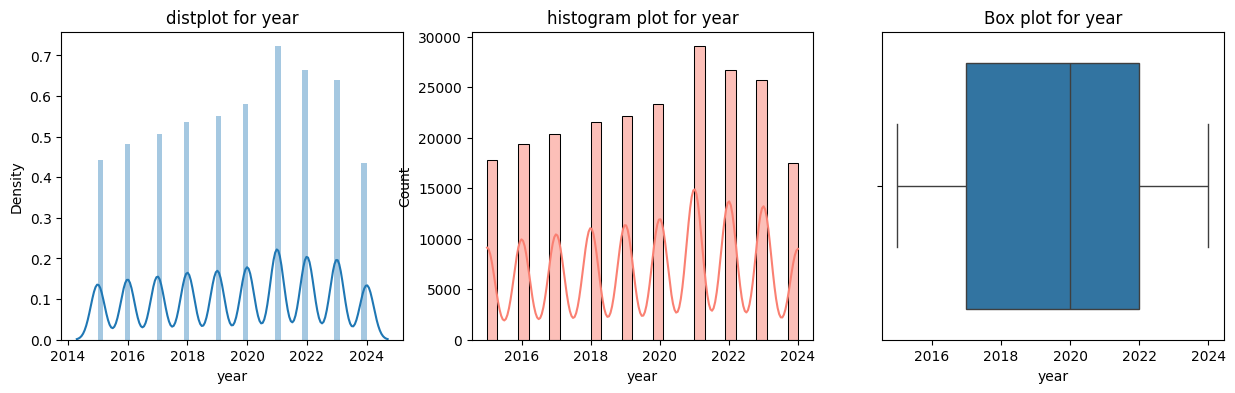

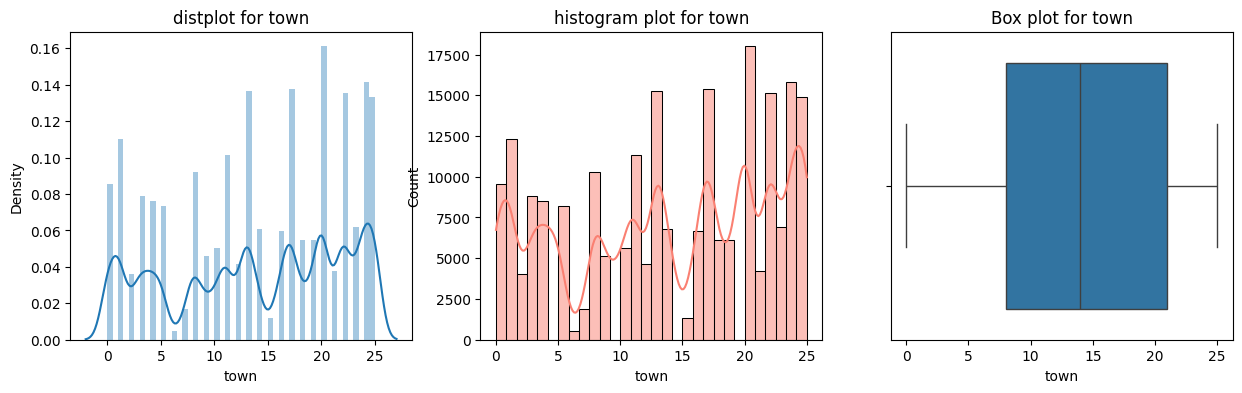

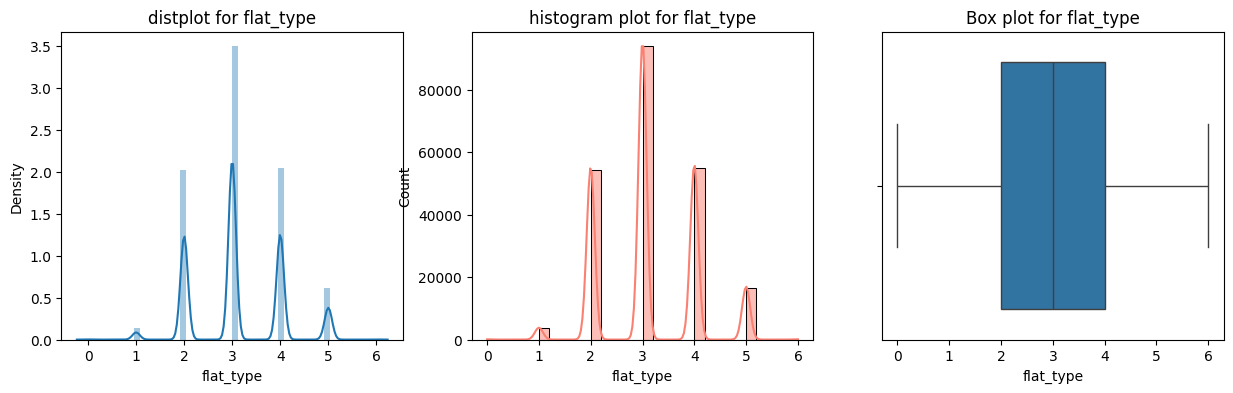

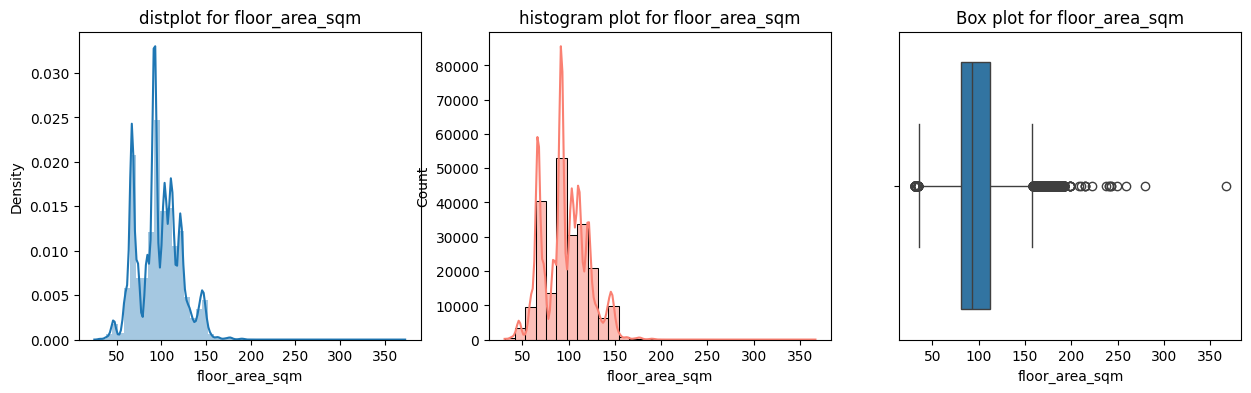

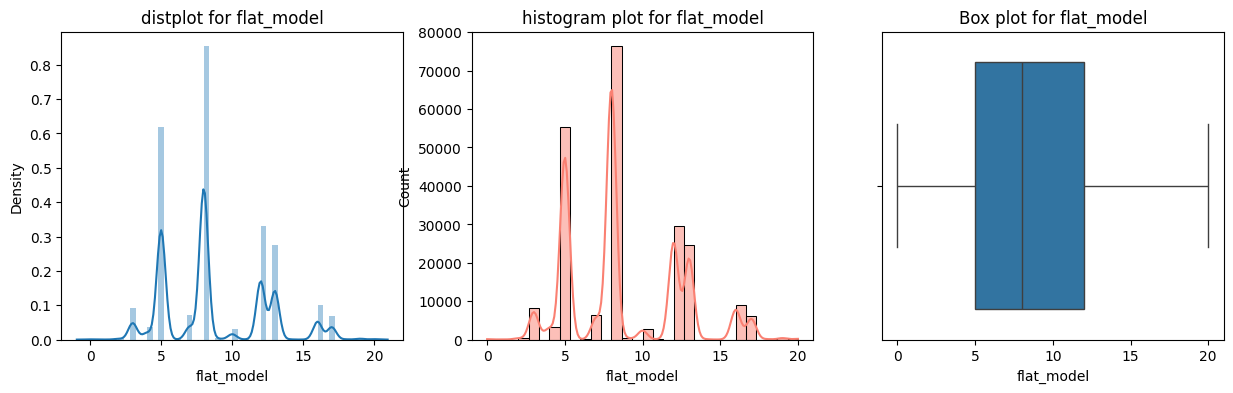

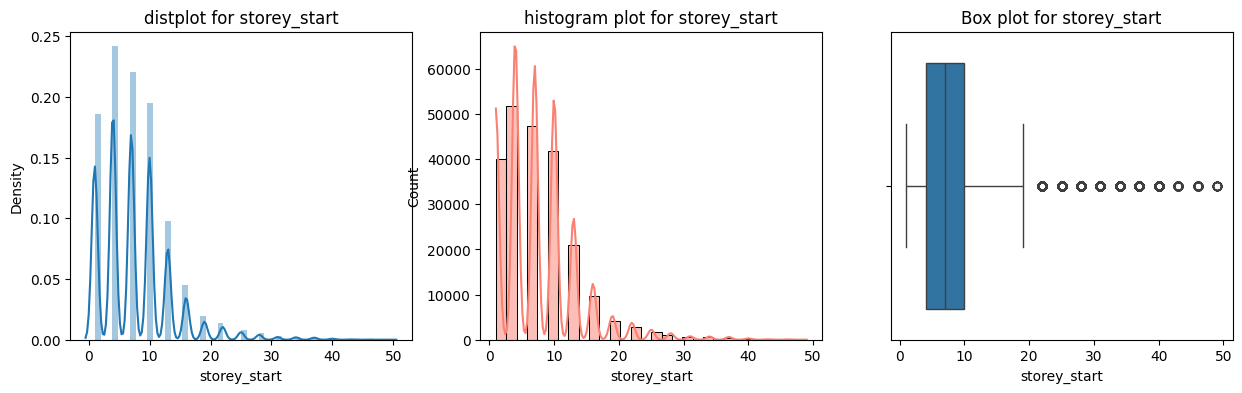

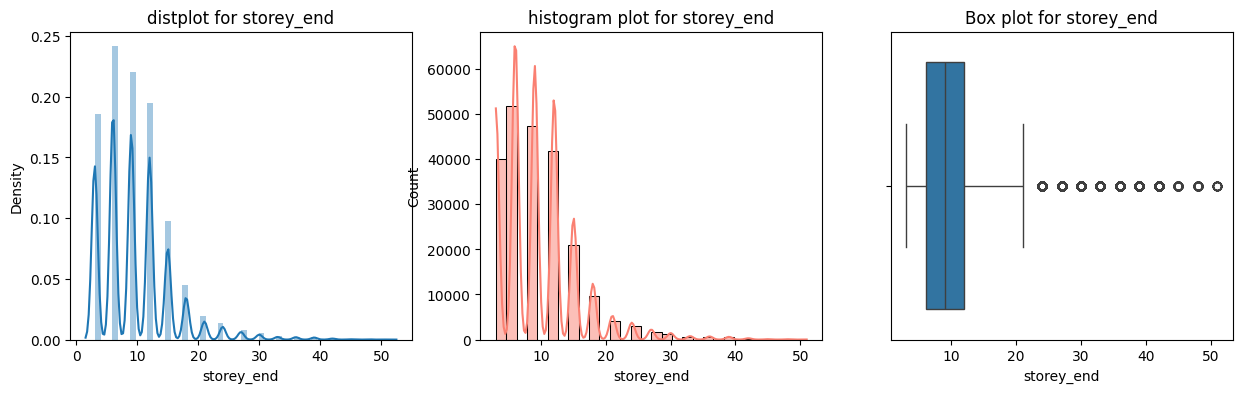

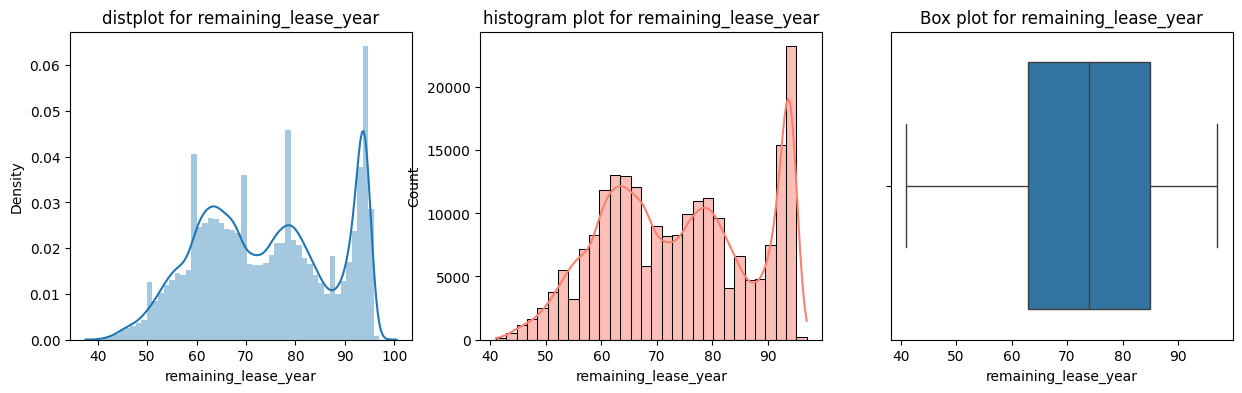

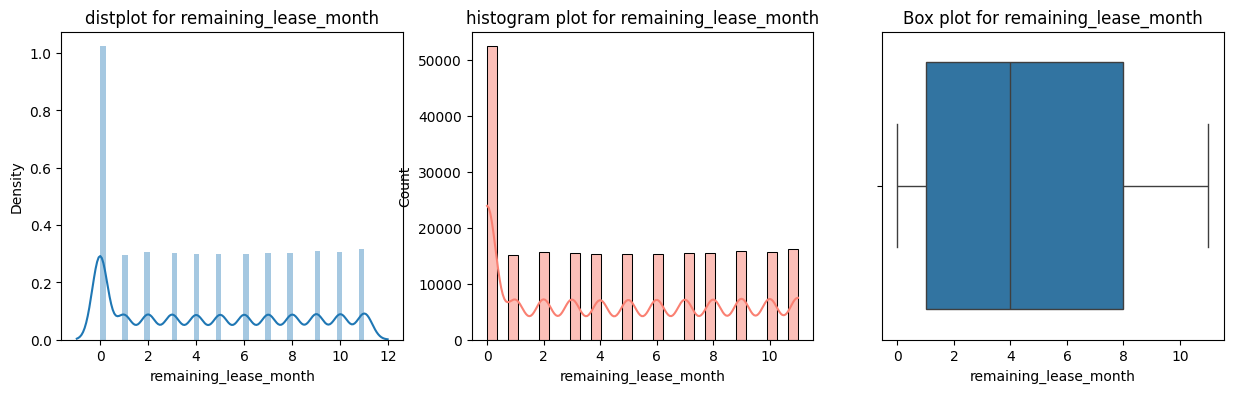

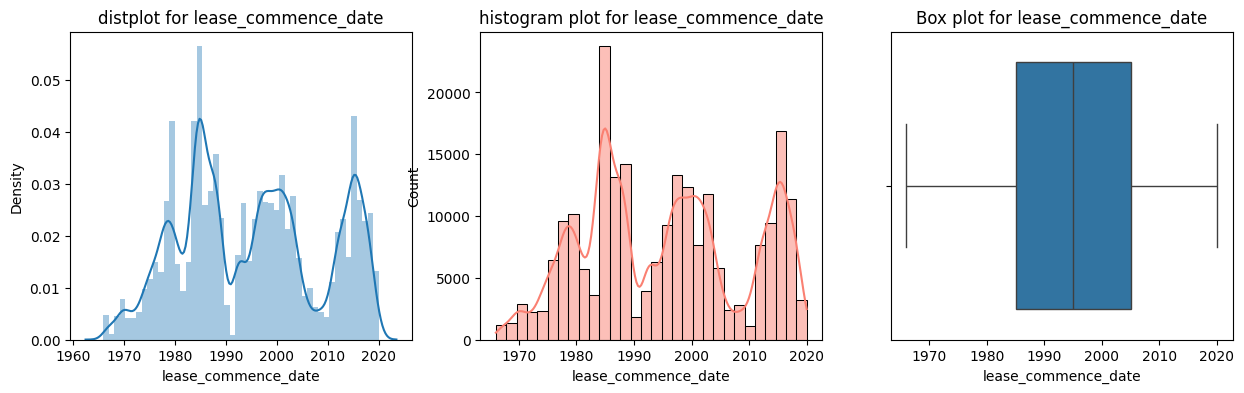

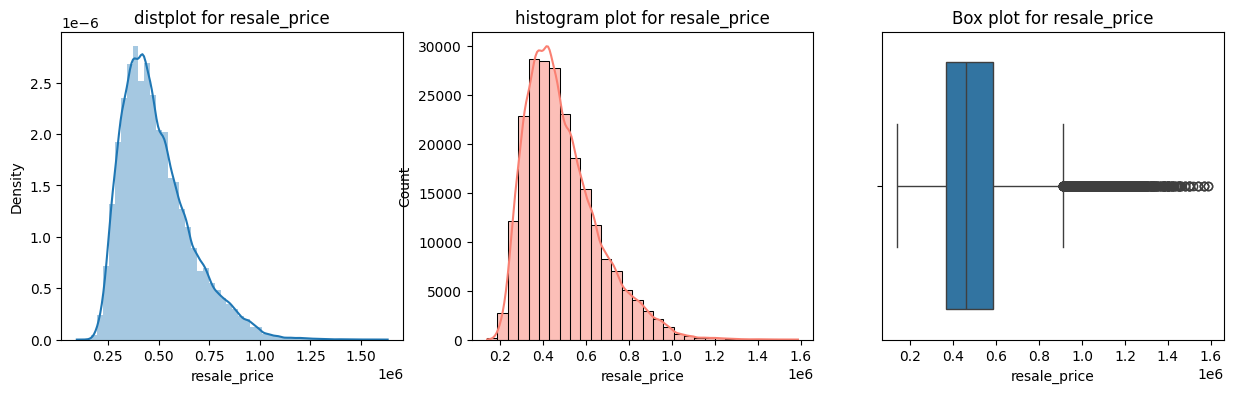

In [266]:
for i in final_df2.columns:
    plot(final_df2, i)

In [268]:
final_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,223529.0,2019.719222,2.738034,2015.0,2017.0,2020.0,2022.0,2024.0
town,223529.0,13.888001,7.957068,0.0,8.0,14.0,21.0,25.0
flat_type,223529.0,3.118951,0.919431,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,223529.0,97.081399,24.067600,31.0,81.0,93.0,112.0,366.7
flat_model,223529.0,8.687969,3.642299,0.0,5.0,8.0,12.0,20.0
storey_start,223529.0,7.660277,5.846206,1.0,4.0,7.0,10.0,49.0
storey_end,223529.0,9.660277,5.846206,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,223529.0,74.069320,13.526949,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,223529.0,4.624939,3.778212,0.0,1.0,4.0,8.0,11.0
lease_commence_date,223529.0,1995.222539,13.733933,1966.0,1985.0,1995.0,2005.0,2020.0


# SKewnwss handling

In [270]:
final_df3 = final_df2.copy()

In [ ]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [272]:
final_df3["storey_start"] = np.log(final_df3["storey_start"])
final_df3["storey_end"] = np.log(final_df3["storey_end"])
final_df3["resale_price"] = np.log(final_df3["resale_price"])

C:\Users\sagar\AppData\Local\Temp\ipykernel_22696\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sagar\AppData\Local\Temp\ipykernel_22696\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sagar\AppData\Local\Temp\ipykernel_22

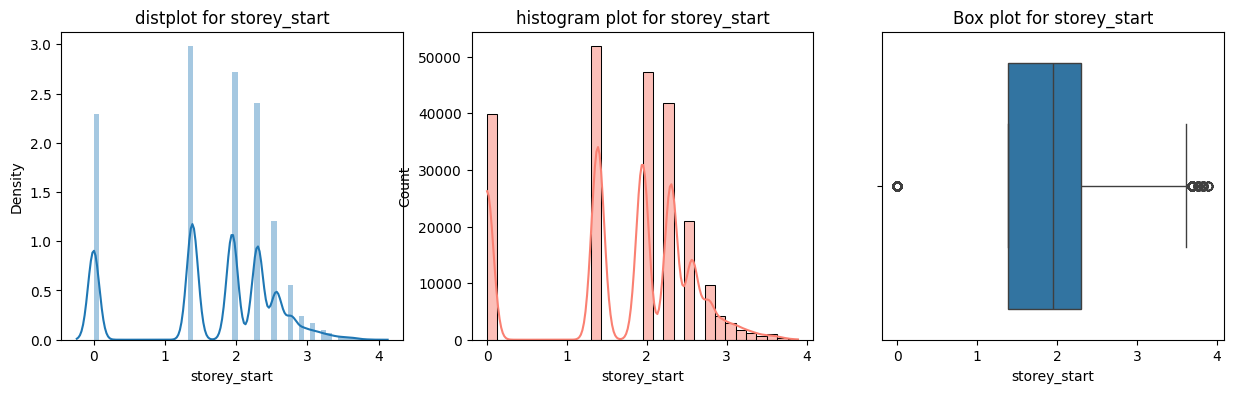

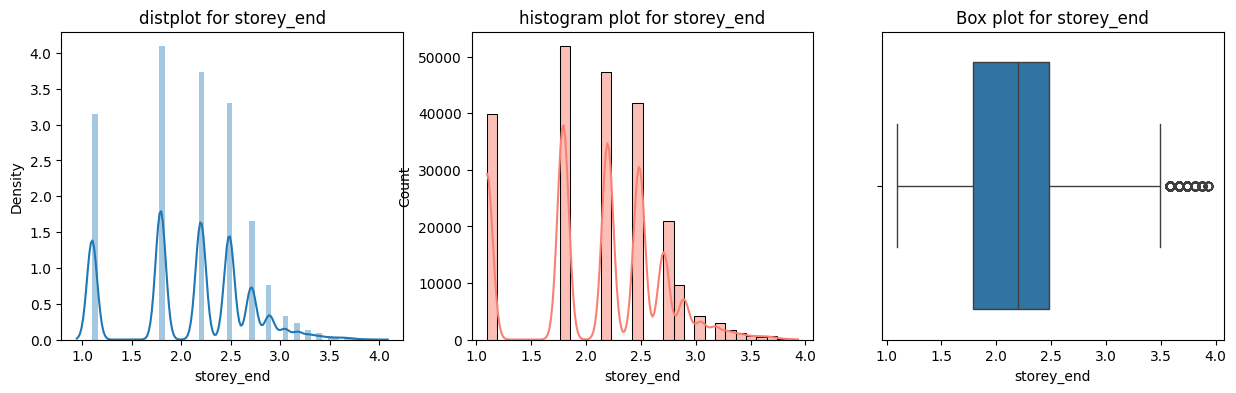

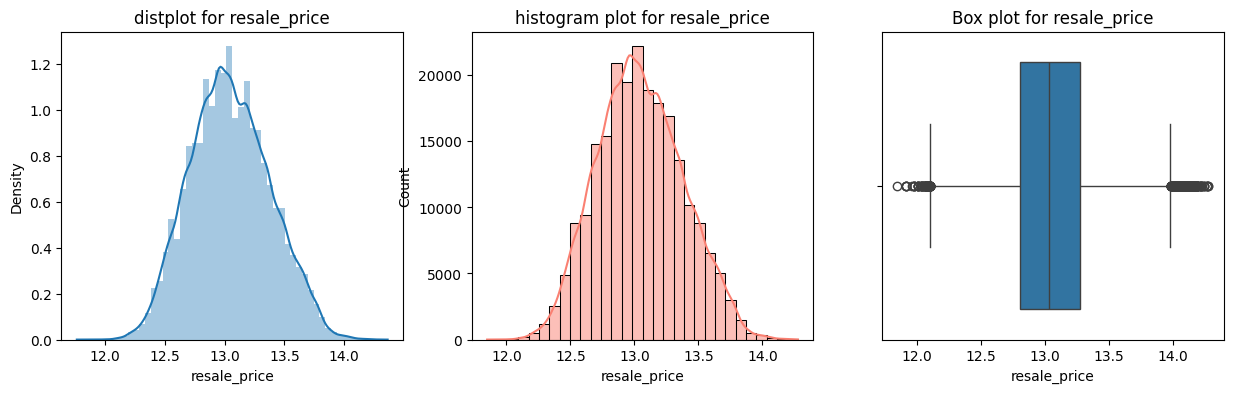

In [273]:
skewed_columns = ["storey_start", "storey_end", "resale_price"]
for i in skewed_columns:
    plot(final_df3, i)

# outlier handling

In [274]:
final_df4 = final_df3.copy()

In [ ]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [282]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [284]:
outlier_columns = ['floor_area_sqm', 'storey_start', 'storey_end', 'resale_price']
for j in outlier_columns:
    outlier(final_df4, j)

C:\Users\sagar\AppData\Local\Temp\ipykernel_22696\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sagar\AppData\Local\Temp\ipykernel_22696\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sagar\AppData\Local\Temp\ipykernel_22

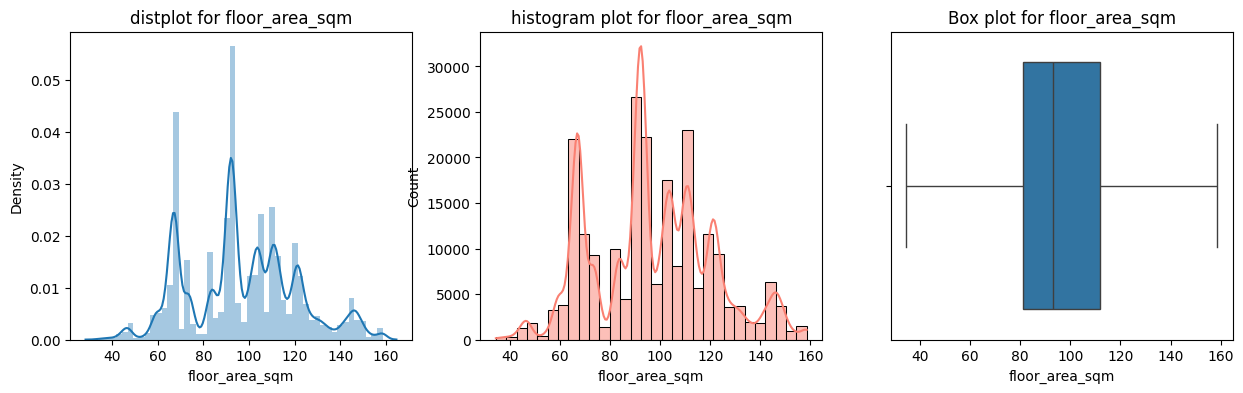

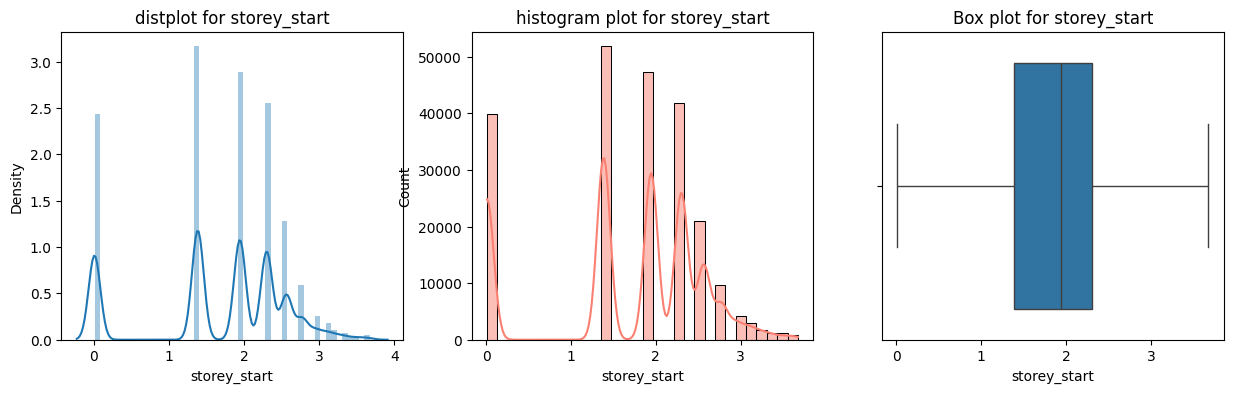

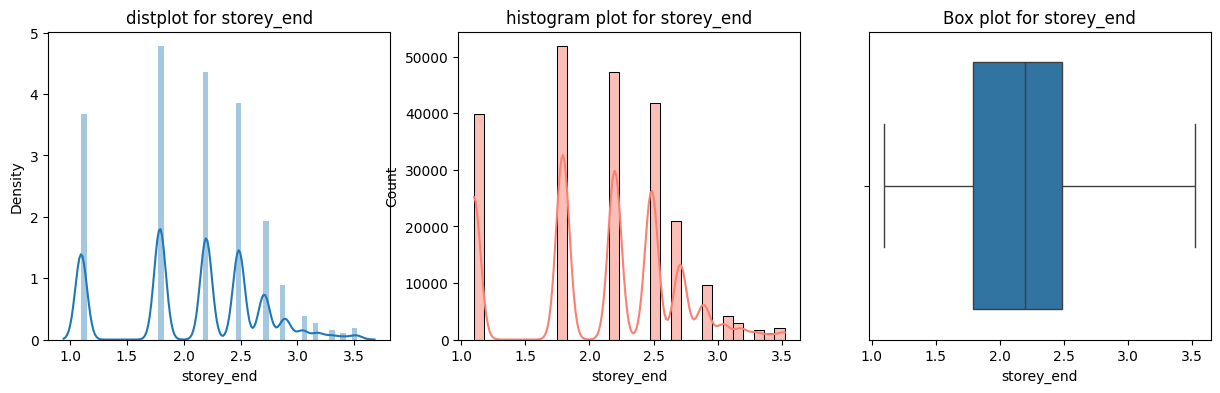

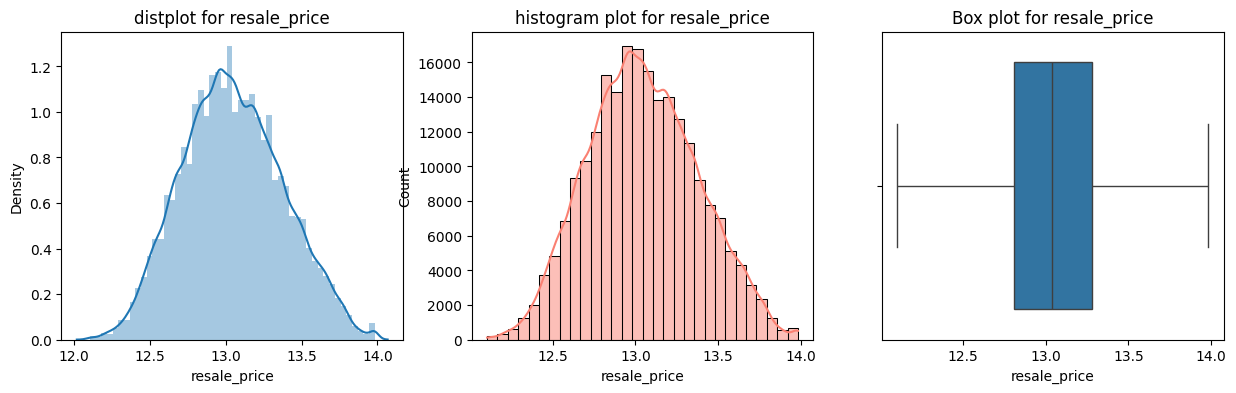

In [285]:
for k in outlier_columns:
    plot(final_df4,k)

<Axes: >

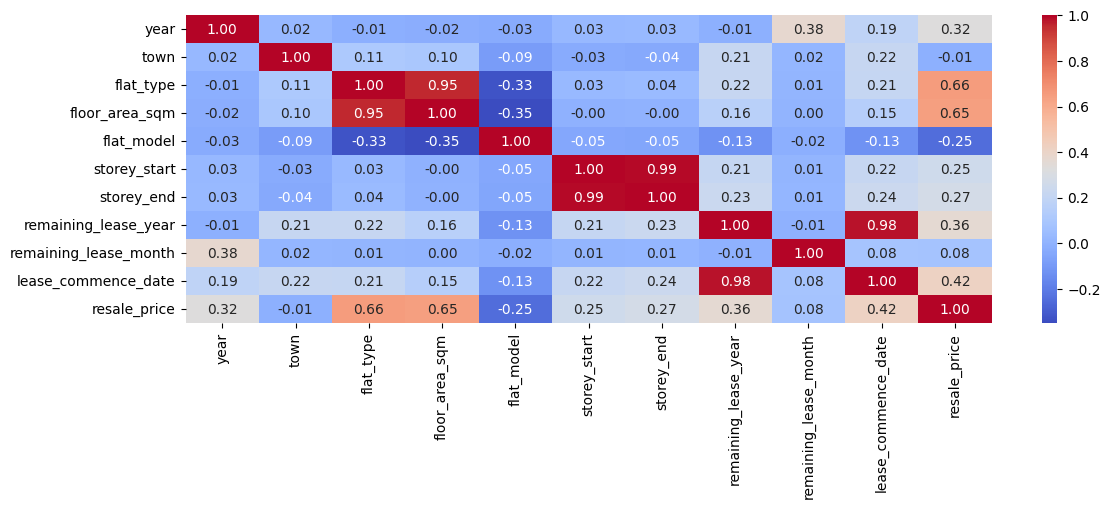

In [297]:
# checking correlation after dealing wiht outliwers:

final_df4_corr = final_df4.corr()
plt.figure(figsize= (13, 4))
sns.heatmap(final_df4_corr, annot= True,cmap= 'coolwarm', fmt= "0.2f")

# model selection (regression)

In [298]:
final_df5 = final_df4.copy()

In [299]:
final_df5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,223529.0,2019.719222,2.738034,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,223529.0,13.888001,7.957068,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,223529.0,3.118951,0.919431,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,223529.0,97.007028,23.826908,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,223529.0,8.687969,3.642299,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,223529.0,1.695734,0.921056,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,223529.0,2.093505,0.601442,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,223529.0,74.069320,13.526949,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,223529.0,4.624939,3.778212,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,223529.0,1995.222539,13.733933,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000


In [300]:
np.exp(13.982182)

np.float64(1181366.0543110792)

In [302]:
#checking how many datas are outliers based on resale_price
final_df1[final_df1["resale_price"] >= 1135620]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
36490,2016,12,14,2.0,259.0,18.0,6823,1,3,54,0,1972,1150000.0
38482,2017,2,2,4.0,120.0,4.0,3229,40,42,93,7,2011,1180000.0
48007,2017,7,18,5.0,156.0,3.0,1230,19,21,77,3,1995,1160000.0
54573,2017,11,7,4.0,107.0,20.0,1946,43,45,92,2,2011,1138000.0
60396,2018,3,7,4.0,107.0,20.0,1943,37,39,91,10,2011,1145000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223630,2024,8,18,3.0,95.0,14.0,9288,34,36,90,9,2016,1380000.0
223635,2024,8,18,4.0,117.0,5.0,7330,22,24,86,2,2011,1210000.0
223711,2024,8,21,5.0,146.0,7.0,3959,4,6,60,6,1986,1150000.0
223712,2024,8,21,5.0,150.0,3.0,3919,7,9,60,4,1985,1230000.0


In [303]:
np.exp(12.102935)

np.float64(180400.56165631127)

In [304]:
#checking how many datas are outliers based on resale_price
final_df1[final_df1["resale_price"] <= 180694]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8087,4,6,56,8,1975,175000.0
62238,2018,4,10,1.0,42.0,17.0,6208,4,6,49,9,1969,180000.0
62989,2018,4,21,2.0,64.0,5.0,3560,13,15,59,2,1978,170000.0
64274,2018,5,15,1.0,42.0,5.0,1417,1,3,55,11,1975,180000.0
65495,2018,6,4,0.0,31.0,5.0,8087,1,3,55,10,1975,176000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120053,2020,11,4,1.0,42.0,17.0,5848,10,12,48,5,1970,180000.0
126747,2021,1,24,1.0,45.0,5.0,2347,7,9,64,5,1986,180000.0
127297,2021,2,4,0.0,31.0,5.0,8087,4,6,53,1,1975,180000.0
197149,2023,8,22,2.0,67.0,8.0,6380,7,9,91,3,2015,150000.0


In [305]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [306]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [307]:
select_model(final_df5, LinearRegression)
select_model(final_df5, DecisionTreeRegressor)
select_model(final_df5, RandomForestRegressor)
select_model(final_df5, AdaBoostRegressor)
select_model(final_df5, ExtraTreesRegressor)
select_model(final_df5, GradientBoostingRegressor)
select_model(final_df5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6788522033205915, 'Mean_squared_error': np.float64(0.035642305349572204), 'Root_mean_squared_error': np.float64(0.188791698306817), 'Mean_absolute_error': np.float64(0.14768521994338293)}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6795856557975406, 'Mean_squared_error': np.float64(0.035365360409855), 'Root_mean_squared_error': np.float64(0.18805680101994451), 'Mean_absolute_error': np.float64(0.1473035350907724)}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9963010446901737, 'Mean_squared_error': np.float64(0.0004105252970452847), 'Root_mean_squared_error': np.float64(0.020261423865199718), 'Mean_absolute_error': np.float64(0.007197163587217672)}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9268311331047826, 'Mean_squared_error': np.float64(0.008075928544868837), 'Root_mean_squared_error': np.float64(0.08986617019139537), 'Mean_absolute_error': np.floa

In [310]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= final_df5.drop(columns=["resale_price"])
y= final_df5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9553377729803643, 'Mean_squared_error': np.float64(0.004929541338692849), 'Root_mean_squared_error': np.float64(0.0702106924812229), 'Mean_absolute_error': np.float64(0.05167721627269937)}


In [311]:
final_df5.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [312]:
np.exp(12.815838)

np.float64(367999.92008841544)

In [313]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

d:\Singapore resale prioce\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(12.805474402454298)

In [314]:
np.exp(12.805474402454298)

np.float64(364205.8112866283)

In [315]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [316]:
import pickle
import numpy as np

In [317]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [318]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

d:\Singapore resale prioce\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(12.269790152987808)

In [319]:
np.exp(12.269790152987808)

np.float64(213158.2556287098)

In [323]:
final_df5["year"].value_counts().index.sort_values()

Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int64', name='year')